In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
coffee_shops = pd.read_csv('coffee.csv')

In [15]:
coffee_shops

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True
...,...,...,...,...,...,...,...,...,...
195,H,Artist,Others,4.6,963.0,$$$,False,True,True
196,H,Dream Cafe,Cafe,4.3,646.0,$$,False,True,True
197,H,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,4.6,16.0,$$,False,True,True
198,H,Ob'yektna Kava,Coffee shop,4.7,599.0,$$,False,True,True


In [16]:
print(coffee_shops.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB
None


In [21]:
# Check Region column, count missing values, fill missing values with 'Unknown' value
np.sort(coffee_shops.Region.unique())
coffee_shops.Region.isna().sum()
coffee_shops['Region'] = coffee_shops['Region'].fillna('Unknown')

# Check Place name column, count missing values, fill missing values with 'Unknown' value
np.sort(coffee_shops['Place name'].unique())
coffee_shops['Place name'].isna().sum()
coffee_shops['Place name'] = coffee_shops['Place name'].fillna('Unknown')

# Check Place type column, count missing values, fill missing values with 'Unknown' value
np.sort(coffee_shops['Place type'].unique())
coffee_shops['Place type'].isna().sum()
coffee_shops['Place type'] = coffee_shops['Place type'].fillna('Unknown')

# Check Rating column, count missing values, fill missing values with 0 value
np.sort(coffee_shops['Rating'].unique())
coffee_shops['Rating'].isna().sum()
coffee_shops['Rating'] = coffee_shops['Rating'].fillna(0)

# Check Reviews column, count missing values, fill missing values with median value, rounded to the nearest int.value
np.sort(coffee_shops['Reviews'].unique())
coffee_shops['Reviews'].isna().sum()
coffee_shops['Reviews'] = coffee_shops['Reviews'].fillna(coffee_shops['Reviews'].median()).astype("int")

# Check Price column, count missing values, fill missing values with 0 value
np.sort(coffee_shops['Price'].unique())
coffee_shops['Price'].isna().sum()
coffee_shops['Price'] = coffee_shops['Price'].fillna('Unknown')

# Check Delivery option column, count missing values, fill missing values with False
np.sort(coffee_shops['Delivery option'].unique())
coffee_shops['Delivery option'].isna().sum()
coffee_shops['Delivery option'] = coffee_shops['Delivery option'].fillna(False)

# Check Dine in option column, count missing values, fill missing values with False
np.sort(coffee_shops['Dine in option'].unique())
coffee_shops['Dine in option'].isna().sum()
coffee_shops['Dine in option'] = coffee_shops['Dine in option'].fillna(False)

# Check Takeout option column, count missing values, fill missing values with False
np.sort(coffee_shops['Takeout option'].unique())
coffee_shops['Takeout option'].isna().sum()
coffee_shops['Takeout option'] = coffee_shops['Takeout option'].fillna(False)

cleaned_coffee_shops = coffee_shops.copy()

In [25]:
# Create new aggregated table
coffee_shops_agg = cleaned_coffee_shops.groupby('Place type')["Reviews"].agg(["median", "min", "max"]).reset_index(drop=False)
coffee_shops_agg.columns = ["Place type", "Median", "Minimum", "Maximum"]
coffee_shops_agg

,Place type,Median,Minimum,Maximum
0,Cafe,299.0,9,2236
1,Coffee shop,292.0,3,17937
2,Espresso bar,204.0,11,1908
3,Others,167.0,10,2381


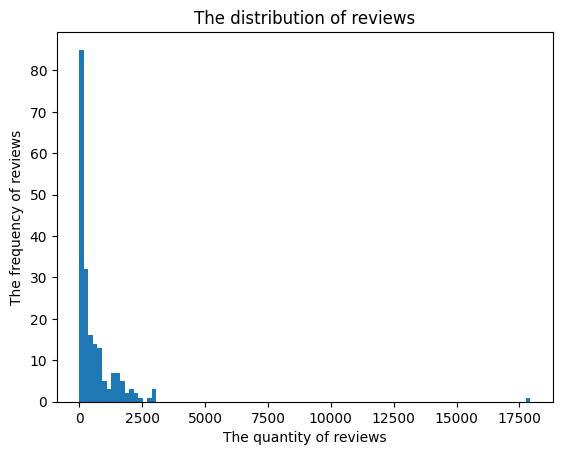

In [28]:
#create a histogram to see the distribution of reviews
plt.hist(cleaned_coffee_shops['Reviews'], bins=100)
plt.xlabel('The quantity of reviews')
plt.ylabel('The frequency of reviews')
plt.title('The distribution of reviews')
plt.show()

In [29]:
# There is an extreme value in distribution. Filter this number of reviews
coffee_shops_filtered = cleaned_coffee_shops[cleaned_coffee_shops["Reviews"] < 10000]
coffee_shops_filtered

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206,$$,False,False,False
1,C,Коферум,Cafe,5.0,24,$$,False,False,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11,$$,False,False,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12,$$,False,True,True
...,...,...,...,...,...,...,...,...,...
195,H,Artist,Others,4.6,963,$$$,False,True,True
196,H,Dream Cafe,Cafe,4.3,646,$$,False,True,True
197,H,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,4.6,16,$$,False,True,True
198,H,Ob'yektna Kava,Coffee shop,4.7,599,$$,False,True,True


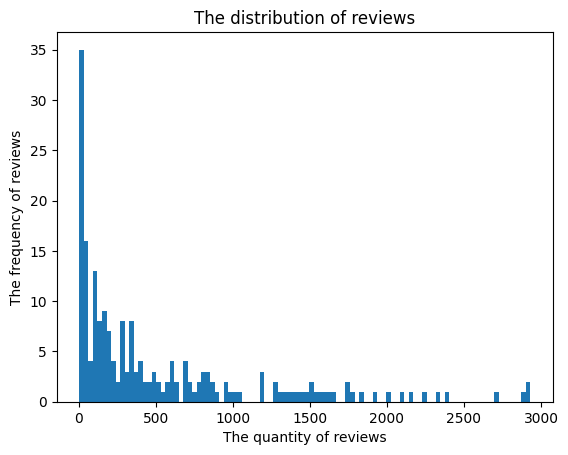

In [32]:
#create a new histogram to see the distribution of reviews without extremum
plt.hist(coffee_shops_filtered['Reviews'], bins=100)
plt.xlabel('The quantity of reviews')
plt.ylabel('The frequency of reviews')
plt.title('The distribution of reviews')
plt.show()

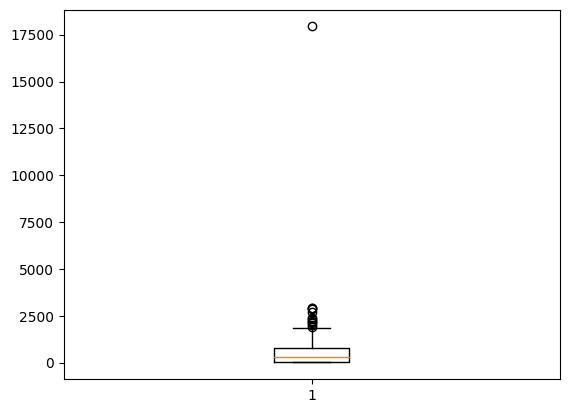

In [36]:
plt.boxplot(cleaned_coffee_shops['Reviews'])
plt.show()

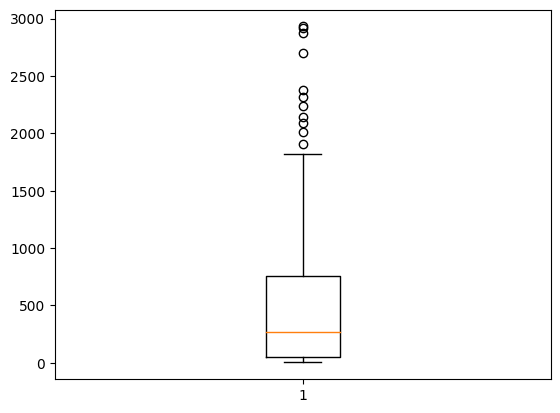

In [37]:
plt.boxplot(coffee_shops_filtered['Reviews'])
plt.show()

In [53]:
reviews_by_type = cleaned_coffee_shops.pivot_table(values='Reviews', columns='Place type', index='Place name', aggfunc='sum')
reviews_by_type

Place type,Cafe,Coffee shop,Espresso bar,Others
Place name,,,,
"""®КАВА БАЗА®""",NaN,NaN,NaN,21.0
"""Точка кофе""",NaN,NaN,14.0,NaN
"""Франс.уа"" кофейня-пекарня",9.0,NaN,NaN,NaN
Anso Coffee,NaN,40.0,NaN,NaN
Aroma kava,226.0,NaN,NaN,NaN
...,...,...,...,...
Смажимо каву в Одесі. Обсмажувальна №2,NaN,335.0,NaN,NaN
Смажимо каву. Обсмажувальна N3,NaN,113.0,NaN,NaN
Столовая BUFET,440.0,NaN,NaN,NaN
